<a href="https://www.kaggle.com/code/kamalesh1997/income-inequality-prediction?scriptVersionId=161378024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iip-data/data.csv


## Import Libraries


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import missingno as mssno
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,RocCurveDisplay,roc_curve,roc_auc_score

from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib

# Import Data

In [3]:
df=pd.read_csv("/kaggle/input/iip-data/data.csv")

In [4]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [5]:
df.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [6]:
print("Rows-",df.shape[0])
print("Columns-",df.shape[1])

Rows- 209499
Columns- 43


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [8]:
## dropping the ID column
df=df.drop(['ID'],axis=1)

In [9]:
df.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


> # 1. Exploratory Data Analysis

In [10]:
numerical_features = df.select_dtypes(exclude=object)
print("Numerical Features Names = ",numerical_features.columns)
print("Numerical Features Count",len(numerical_features.columns))

discrete_features=[col for col in numerical_features.columns if len(df[col].unique())<25]
print("Discrete Numerical Features",len(discrete_features))
continous_features =  [ col for col in numerical_features.columns if col not in discrete_features]
print("Continous Numerical Features",len(continous_features))

Numerical Features Names =  Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')
Numerical Features Count 13
Discrete Numerical Features 4
Continous Numerical Features 9


In [11]:
categorical_features=df.select_dtypes(include=object)
print("Categorical Features Names =",categorical_features.columns)
print("Categorical Features Count",len(categorical_features.columns))

Categorical Features Names = Index(['gender', 'education', 'class', 'education_institute', 'marital_status',
       'race', 'is_hispanic', 'employment_commitment', 'unemployment_reason',
       'is_labor_union', 'industry_code_main', 'occupation_code_main',
       'household_stat', 'household_summary', 'under_18_family',
       'veterans_admin_questionnaire', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'income_above_limit'],
      dtype='object')
Categorical Features Count 29


In [12]:
## consdering " ?" has a missing values
df.replace(" ?",np.NAN,inplace=True)

## Handling missing values

In [13]:
df.isnull().sum()

age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit                            0
tax_status      

In [14]:
# function returns the column names having more than 50% missing values
def missing_values(df):
    missing_df=pd.DataFrame(100*df.isnull().sum()/df.shape[0],columns=['% Missing'])
    return missing_df[missing_df['% Missing']>0]
     

In [15]:
missing_values(df)

,% Missing
class,50.236517
education_institute,93.650566
unemployment_reason,96.887813
is_labor_union,90.415706
occupation_code_main,50.450837
under_18_family,72.388890
veterans_admin_questionnaire,99.005246
country_of_birth_own,1.750366
country_of_birth_father,3.427701
country_of_birth_mother,3.110277


In [16]:
def plot_count(df, col,title_name):
    # Set background color
    plt.rcParams['figure.facecolor'] = '#FFFAF0'
    
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.4, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'

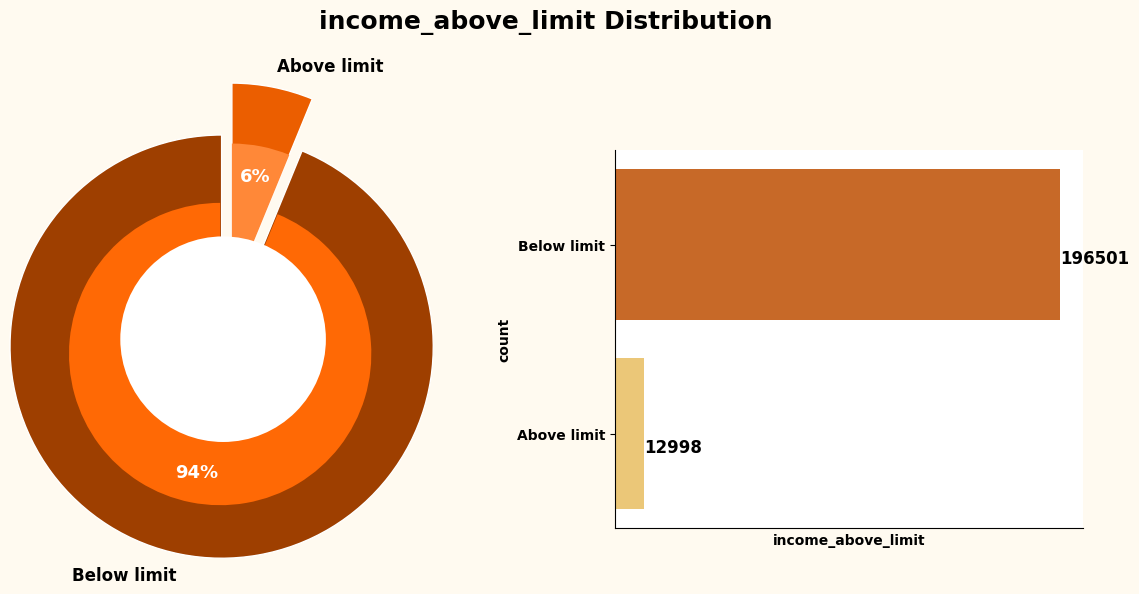

In [17]:
plot_count(df, 'income_above_limit', 'income_above_limit Distribution')

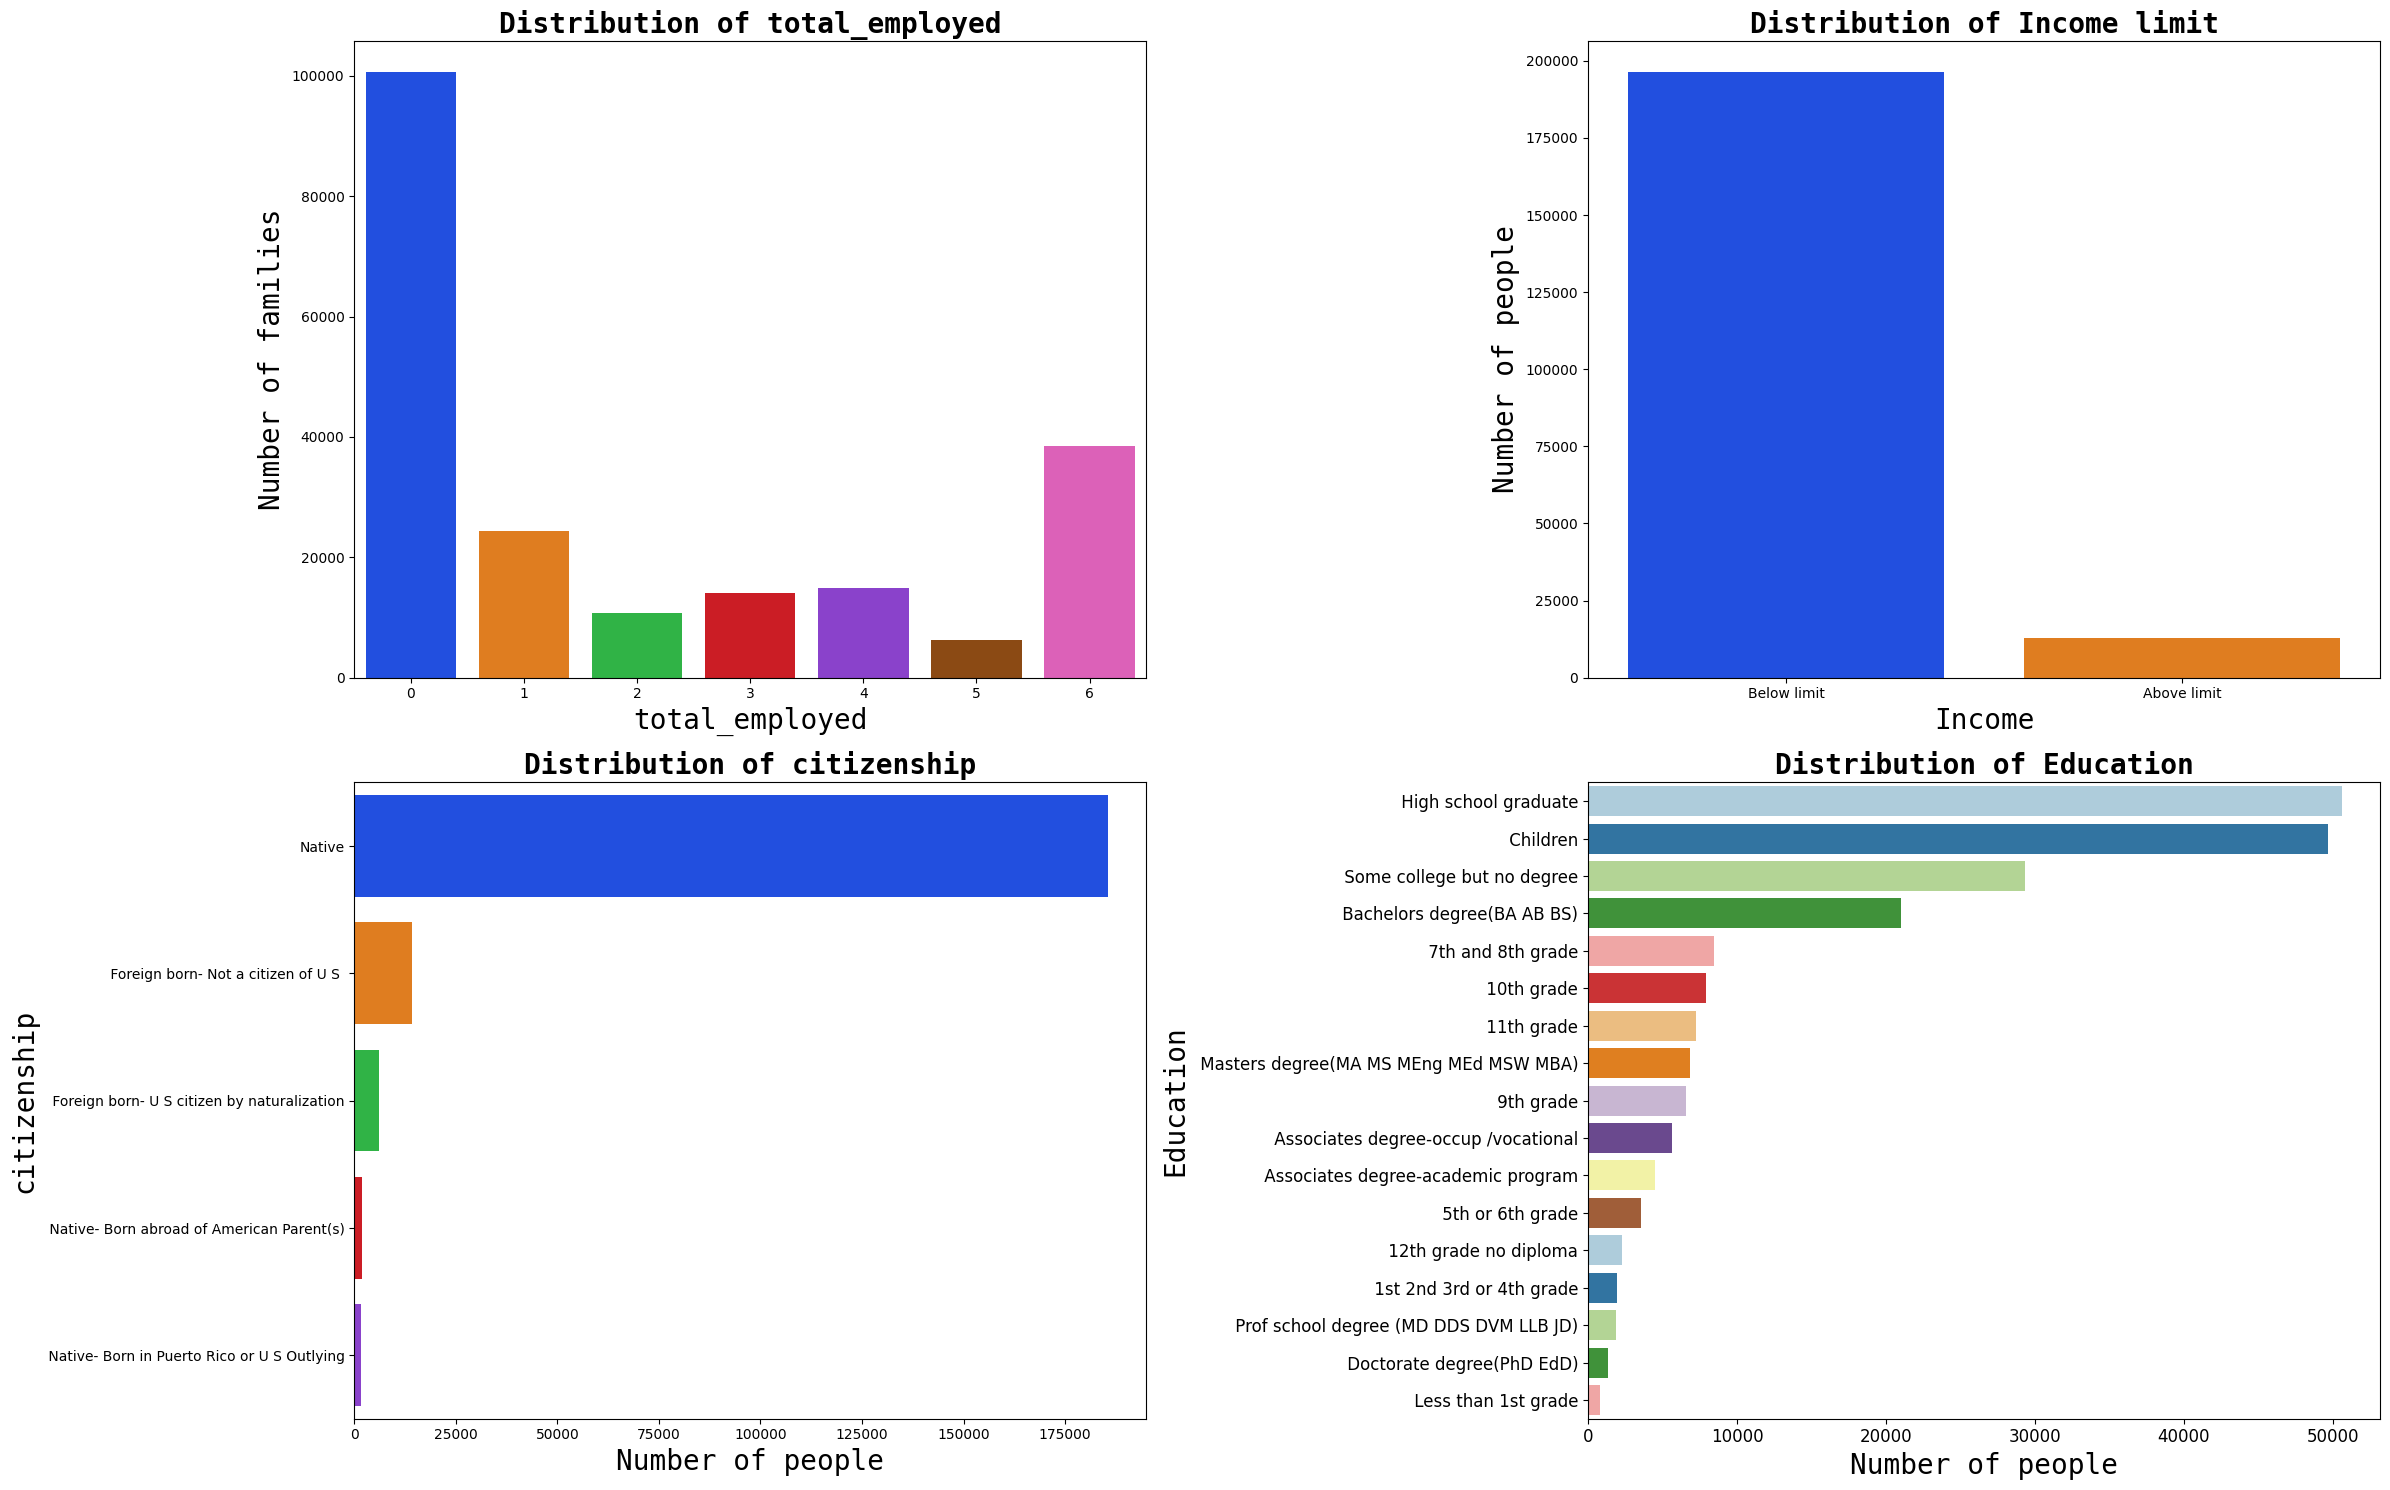

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
df1=df.copy(deep=True)
df1['education'].value_counts()

education
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: count, dtype: int64

In [20]:
df1.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',
             ' 1st 2nd 3rd or 4th grade':'upto 12th',
            ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

<Axes: ylabel='education'>

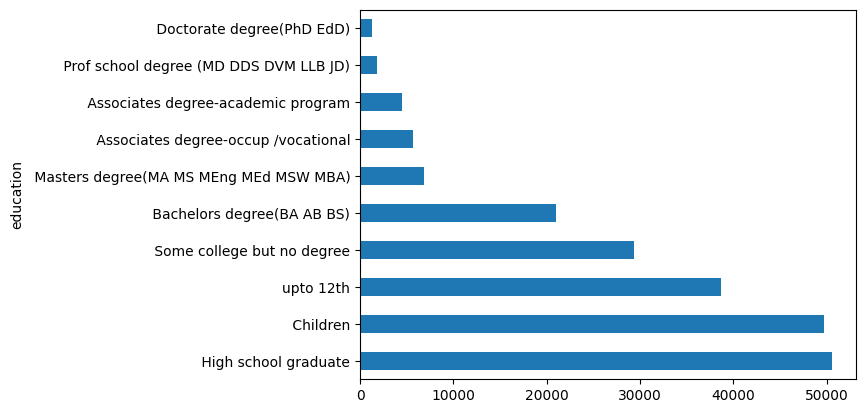

In [21]:
df1['education'].value_counts().plot(kind='barh')

In [22]:
print("Income below limit for people upto 12th:",len(df1[(df1['education']=='upto 12th') & (df1['income_above_limit']=='Below limit')])
/len(df1[df1['education']=='upto 12th'])*100)
print("Income Above limit for people upto 12th:",len(df1[(df1['education']=='upto 12th') & (df1['income_above_limit']=='Above limit')])
      /len(df1[df1['education']=='upto 12th'])*100)

Income below limit for people upto 12th: 99.111409604009
Income Above limit for people upto 12th: 0.8885903959910109


*99% of people with education upto only 12th are under below income limit*

In [23]:
df['citizenship'].value_counts()

citizenship
Native                                          185669
 Foreign born- Not a citizen of U S              14127
 Foreign born- U S citizen by naturalization      6208
 Native- Born abroad of American Parent(s)        1924
 Native- Born in Puerto Rico or U S Outlying      1571
Name: count, dtype: int64

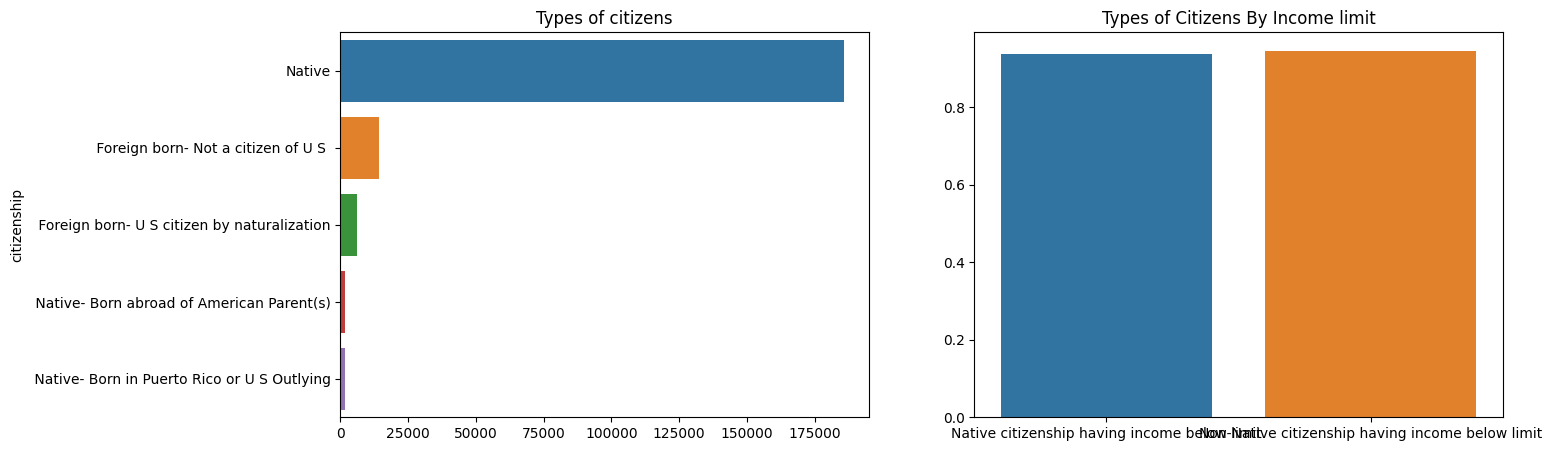

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
x_data=df['citizenship'].value_counts()
axs[0].set_title("Types of citizens")
sns.barplot(x=x_data.values,y=x_data.index,ax=axs[0])



axs[1].set_title("Types of Citizens By Income limit")
data1=len(df.loc[(df['citizenship']=='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['citizenship']=='Native')])
data2=len(df.loc[(df['citizenship']!='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['citizenship']!='Native')])
series=(pd.Series({'Native citizenship having income below limit':data1,
              'Non-Native citizenship having income below limit':data2}))
sns.barplot(y=series.values,x=series.index,ax=axs[1])
plt.show()

*Both Native and Non native has same rate of Income*

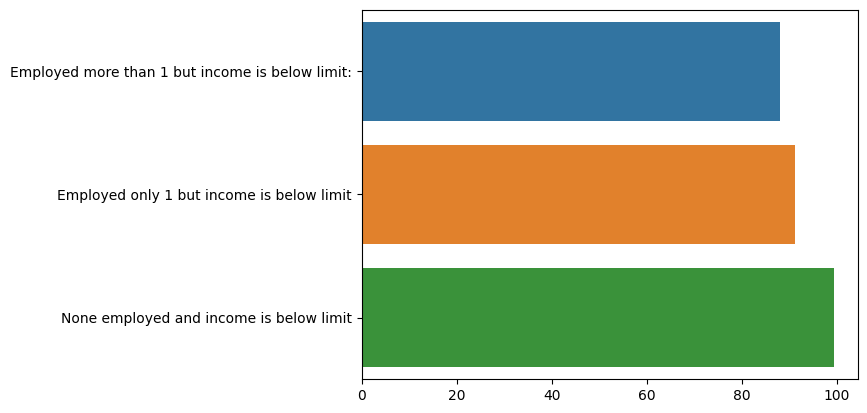

In [25]:
data=pd.Series({'Employed more than 1 but income is below limit:':len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['total_employed']>1)]) * 100,
'Employed only 1 but income is below limit':len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['total_employed']==1)]) * 100,
'None employed and income is below limit':len(df.loc[(df['total_employed']==0) & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['total_employed']==0)]) * 100})
sns.barplot(y=data.index,x=data.values)
plt.show()

In [26]:
print('People above income limit with more than 1 employed:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed: 10199
People above income limit with only 1 employed: 2158


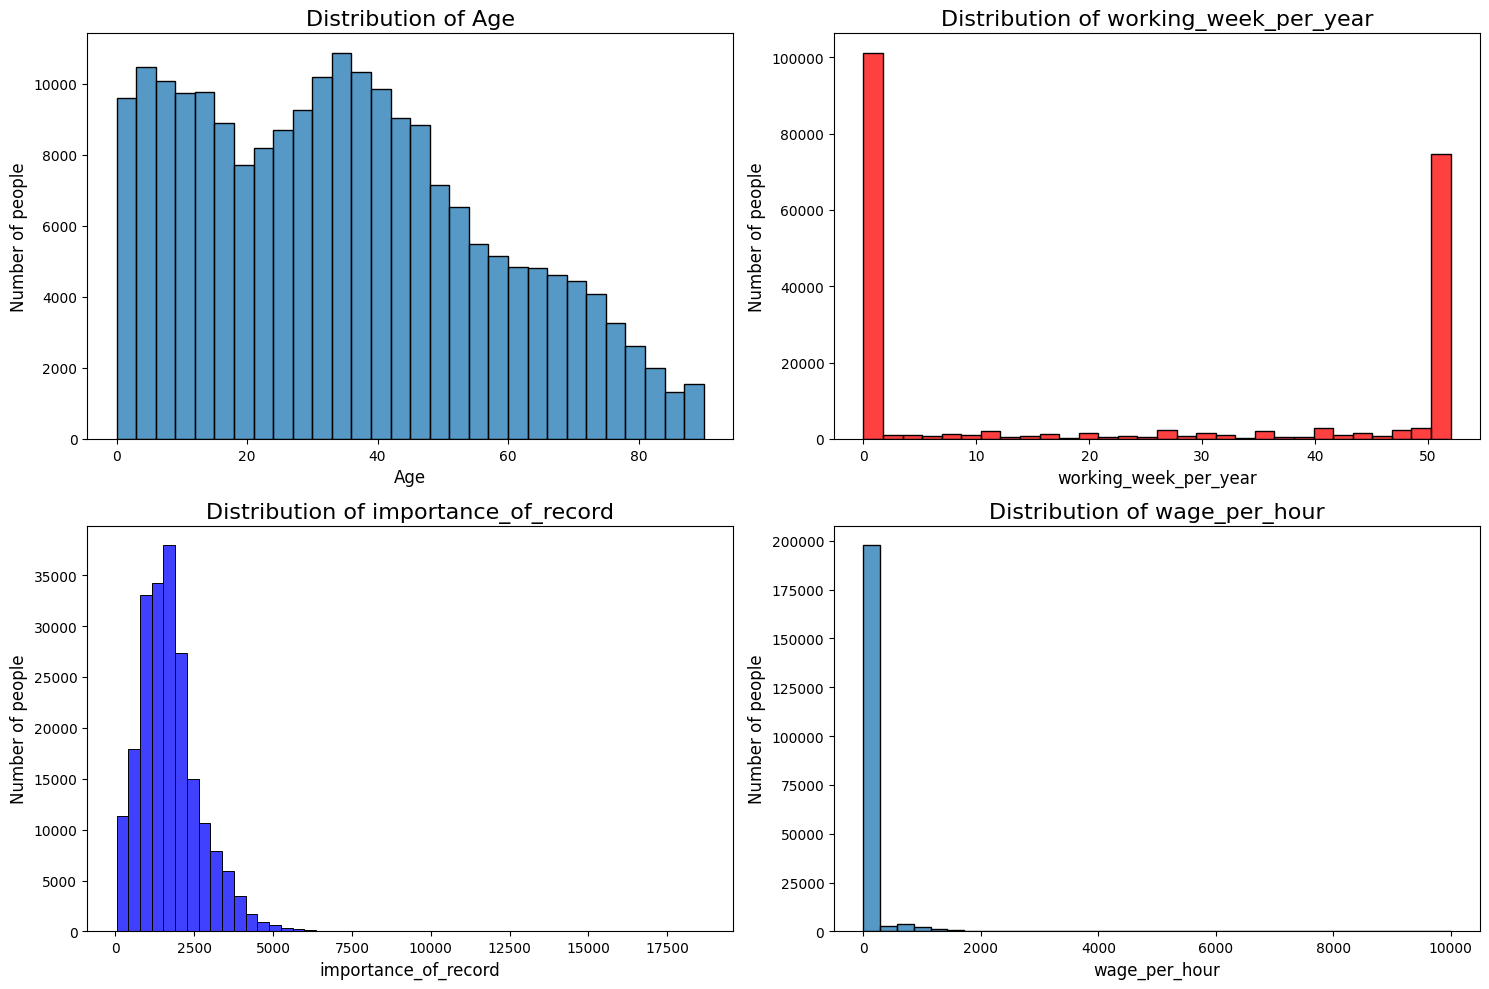

In [27]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of Age
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of working_week_per_year
sns.histplot(df['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of importance_of_record
sns.histplot(df['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of wage_per_hour
sns.histplot(df['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

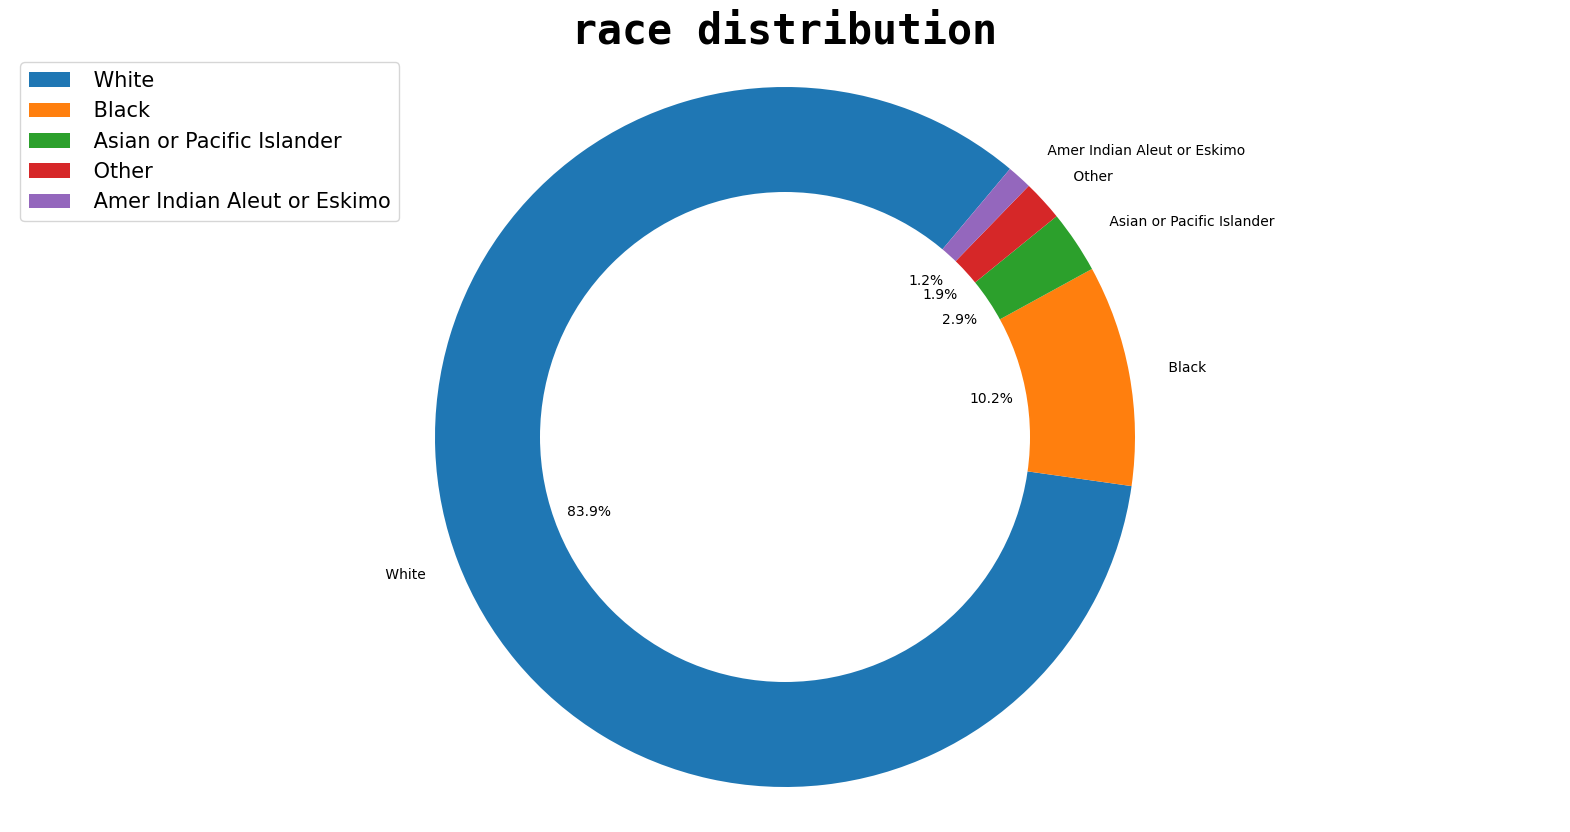

In [28]:
race = df['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

In [29]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %


*There is No Gender Discremination, No High Differenc*e 

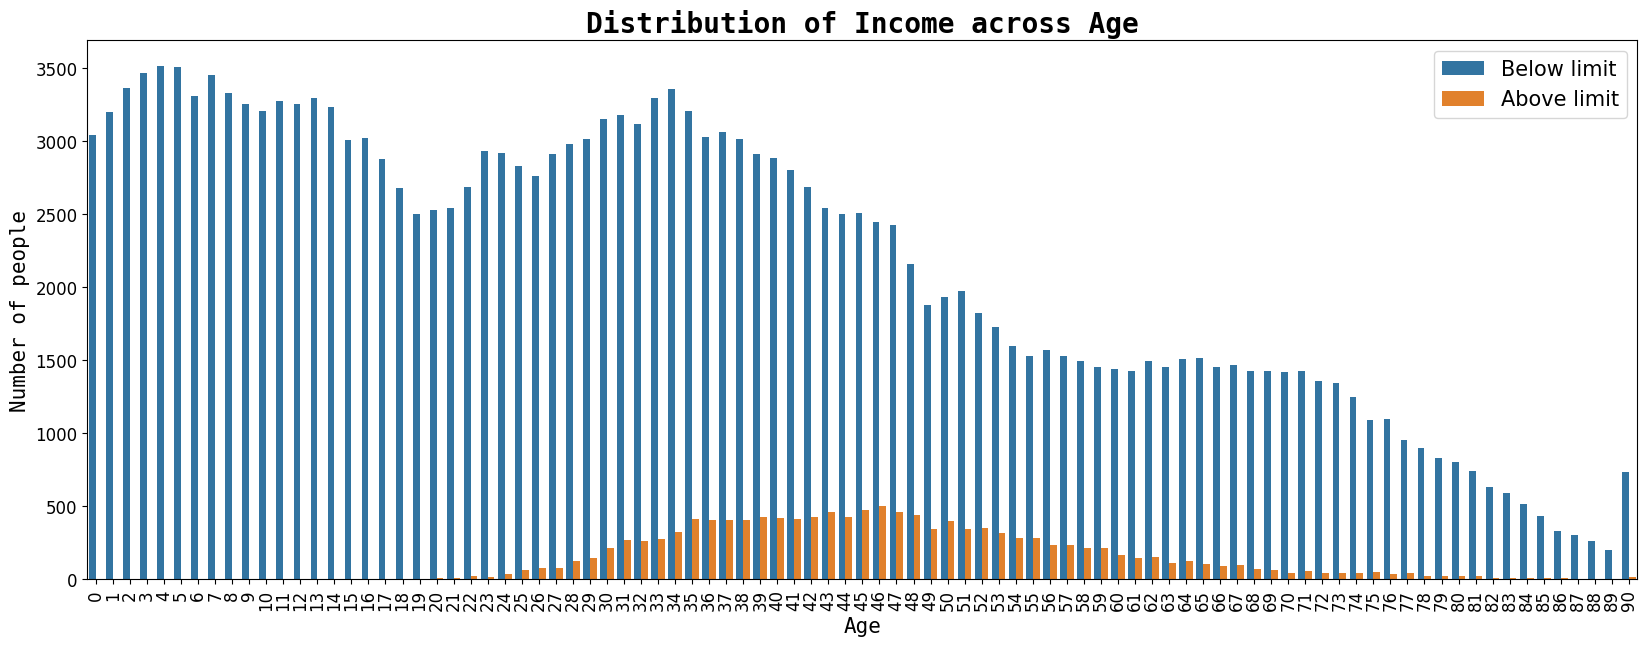

In [30]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

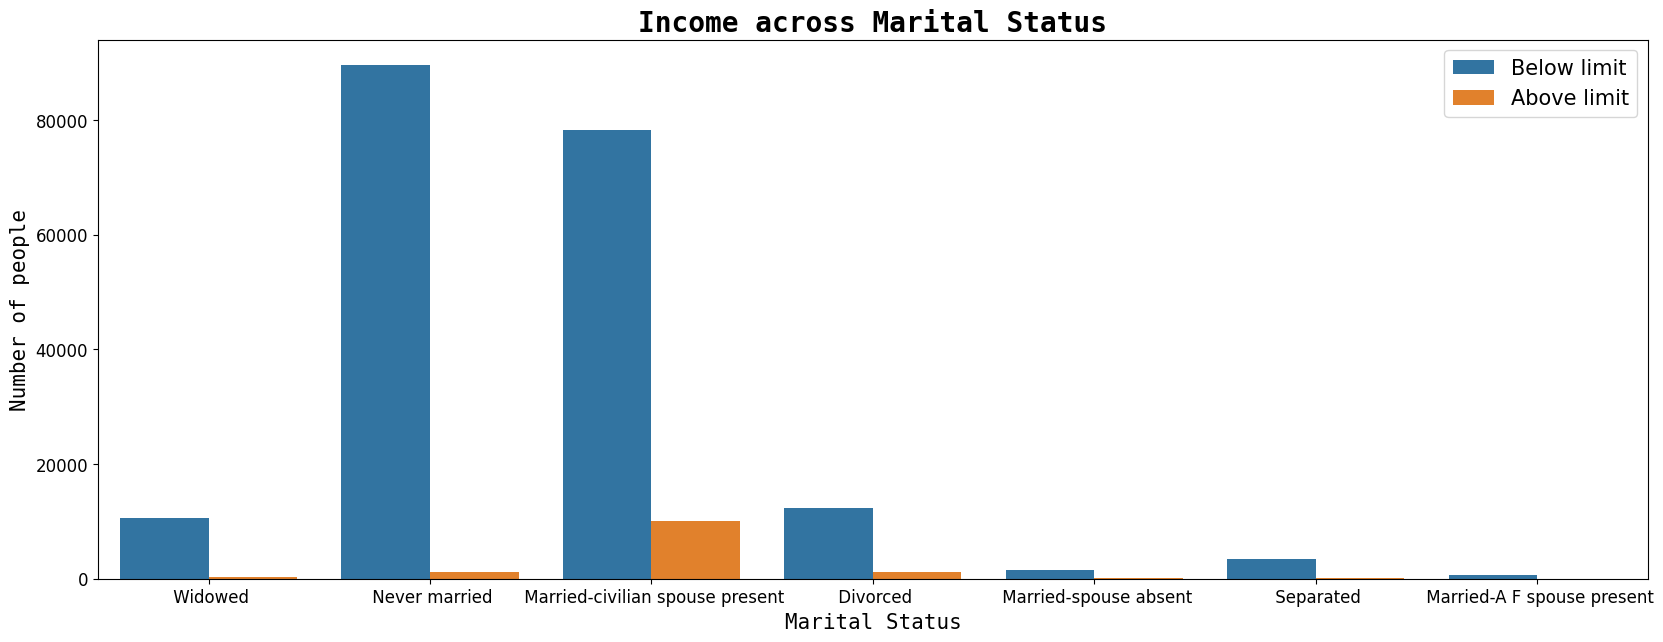

In [31]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income_above_limit'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

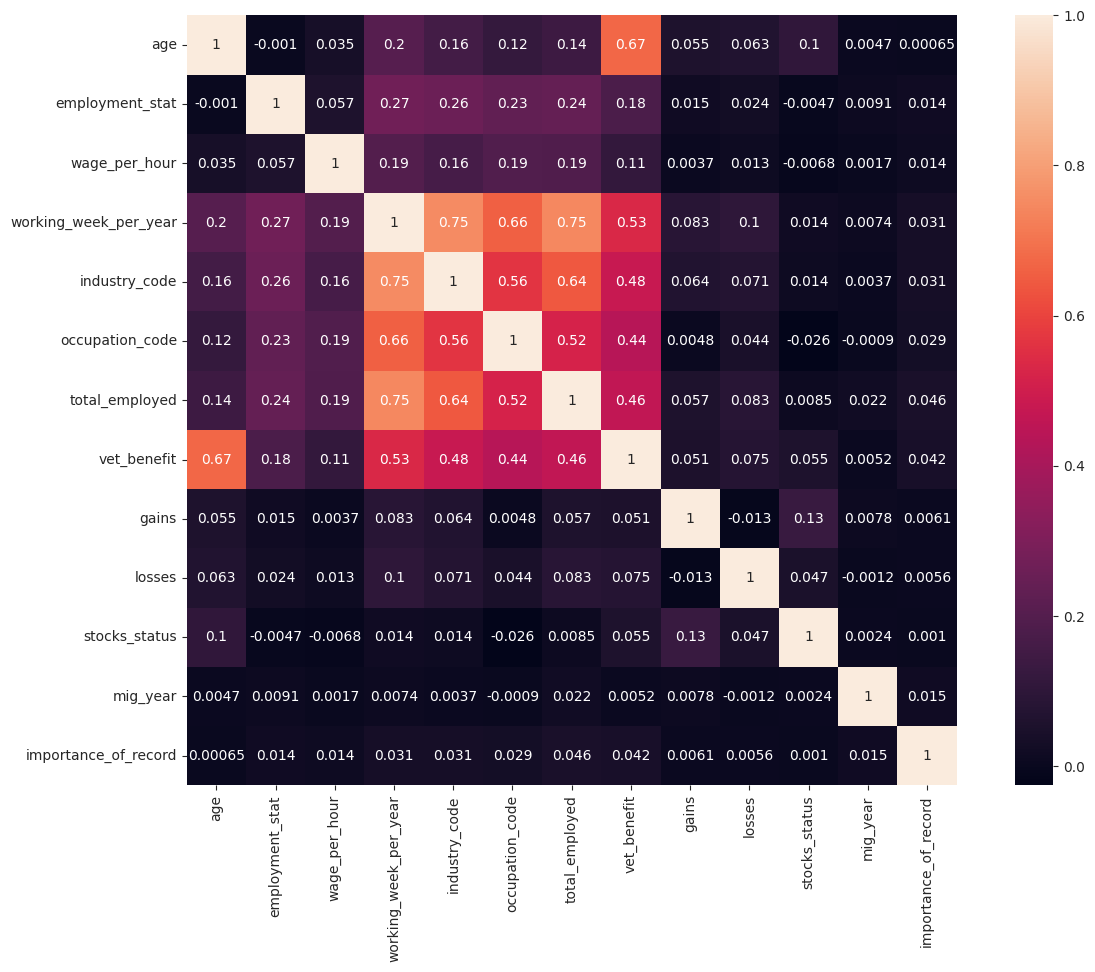

In [32]:
df_num=df.select_dtypes(exclude=object)
corr = df_num.corr(method='pearson')
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True,annot=True)
plt.show()

*The most number of people are young, white, male, high school graduates working 50 weeks per year.
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with capital gains, total_employed, industry code, working week per year*

> # 2.Data Preprocessing

### Handling Missing Values

In [33]:
missing_df=missing_values(df)

In [34]:
print(f"{len(missing_df)} Column(s) have missing values")

17 Column(s) have missing values


In [35]:
print(f"{missing_df[missing_df['% Missing']>50].shape[0]} Column(s) have missing values more than 50%")
missing_df[missing_df['% Missing']>50].index

14 Column(s) have missing values more than 50%


Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state'],
      dtype='object')

In [36]:
## Dropping columns having missing values greater than 50%
columns_to_drop=['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state']

In [37]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(columns_to_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 42)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 28)


In [38]:
missing_values(df)

,% Missing
country_of_birth_own,1.750366
country_of_birth_father,3.427701
country_of_birth_mother,3.110277


* Country of birth own, father, mother are not important features that may have any affect on model

In [39]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [40]:
len(missing_values(df))

0

In [41]:
df.shape

(209499, 25)

### Dealing With Outliers 

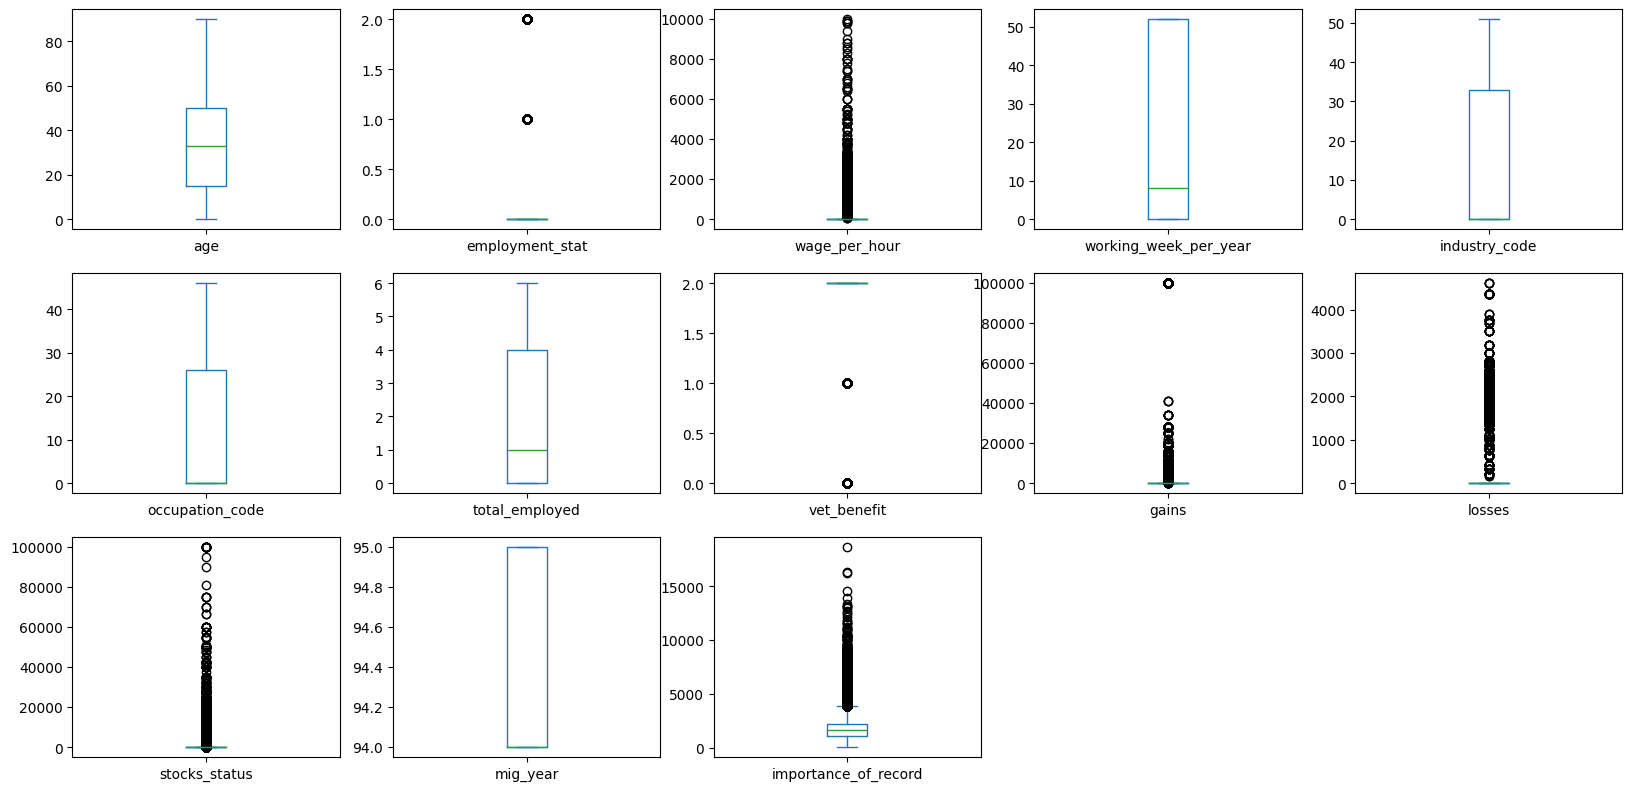

In [42]:
df.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,5), 
                figsize=(20,20), 
                sharex=False, 
                sharey=False);

* These columns are having most outliers 
* 'wage_per_hour','gains','losses','stocks_status','importance_of_record'
* Some of the possible ways to tackle this outlier is to transform values, clip values, drop values or to retain information

* Clipping doesn't seem nice option as it will delete the correct information
* We will check the number of outliers per column to see what can be done

In [43]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower=df[i].quantile(0.25)-(IQR*1.5)
    upper=df[i].quantile(0.75)+(IQR*1.5)
    
    outliers=[]
    
    for j in df[i]:
        if j<lower:
            outliers.append(j)
    for k in df[i]:
        if k>upper:
            outliers.append(k)
    print(f'The percentage of outliers in {i}:',(len(outliers)/len(df)*100),'%')
    

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 3.22626838314264 %


*As the outliers percent are less we will proceed with retaining information and check if transformation can help*

In [44]:
df.sample(5)

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
49203,34,Female,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,2021.19,Below limit
101558,10,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,2157.20,Below limit
129644,2,Male,Children,Never married,White,Mexican (Mexicano),Children or Armed Forces,0,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,2360.65,Below limit
173621,53,Male,10th grade,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,50,...,Householder,2,Joint both under 65,0,0,0,Native,94,3003.04,Below limit
171609,40,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,800,52,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,1134.89,Below limit


In [45]:
df=df.drop(['household_stat'],axis=1)

In [46]:
numerical_fetures=df.select_dtypes(exclude=object)
categorical_features=df.select_dtypes(include=object)
print("Numerical Features Count",len(numerical_features.columns))
print("Categorical Features Count",len(categorical_features.columns))

Numerical Features Count 13
Categorical Features Count 11


### Handling Imbalanced Data

In [47]:
print('The class Imbalance in the data is given below')
print(df['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: proportion, dtype: float64



    Clearly we have a highly imbalanced dataset available with us and hence we need to perform steps to mitigate the imbalance accordingly. So we are going Upsample the minority class (Here, minority class is 'Above limit')
    Downsampling would not be good here as the that would decrease our samples from 200000 to 24000

In [48]:
X=df.drop(['income_above_limit'],axis=1)
y=df['income_above_limit']

In [49]:
#creating the column_name index dictionary
cat_col_index={col_name:i for i,col_name in enumerate(X.columns) if col_name in categorical_features.columns}

list(cat_col_index.values())

[1, 2, 3, 4, 5, 6, 11, 14, 16, 20]

In [50]:
oversampling=SMOTENC(categorical_features=list(cat_col_index.values()),random_state=37)

In [51]:
X_resampled,y_resampled=oversampling.fit_resample(X,y)

In [52]:
X_resampled.shape

(393002, 23)

In [53]:
y_resampled.shape

(393002,)

In [54]:
y_resampled.value_counts()

income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64

*Data is Balanced*

### Train-Test Split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=91)

In [56]:
print(f"shape of training dataset{X_train.shape}")
print(f"shape of testing dataset{X_test.shape}")

shape of training dataset(275101, 23)
shape of testing dataset(117901, 23)


In [57]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,51,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,2,Householder,2,Joint both under 65,0,0,0,Native,94,1339.763660
1,76,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,...,0,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,965.785806
2,25,Female,Associates degree-occup /vocational,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,6,Householder,2,Joint both under 65,7688,0,0,Native,94,1050.420000
3,53,Male,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,5,Householder,2,Joint both under 65,0,0,144,Native,95,639.469447
4,74,Male,Bachelors degree(BA AB BS),Never married,White,All other,Full-time schedules,0,0,2,...,0,Householder,2,Single,25124,0,10571,Native,94,1162.892406


In [58]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,46,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,5,Householder,2,Joint both under 65,7688,0,250,Native,95,1072.925970
1,39,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,3,Householder,2,Joint both under 65,0,0,0,Native,95,796.628444
2,38,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,6,Spouse of householder,2,Joint both under 65,0,0,50,Native,94,1200.051574
3,56,Female,Some college but no degree,Married-spouse absent,White,All other,Children or Armed Forces,0,0,52,...,1,Householder,2,Single,27828,0,0,Native,94,387.980000
4,7,Female,Children,Never married,Other,All other,Children or Armed Forces,0,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,1550.360000


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275101 entries, 0 to 275100
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    275101 non-null  int64  
 1   gender                 275101 non-null  object 
 2   education              275101 non-null  object 
 3   marital_status         275101 non-null  object 
 4   race                   275101 non-null  object 
 5   is_hispanic            275101 non-null  object 
 6   employment_commitment  275101 non-null  object 
 7   employment_stat        275101 non-null  int64  
 8   wage_per_hour          275101 non-null  int64  
 9   working_week_per_year  275101 non-null  int64  
 10  industry_code          275101 non-null  int64  
 11  industry_code_main     275101 non-null  object 
 12  occupation_code        275101 non-null  int64  
 13  total_employed         275101 non-null  int64  
 14  household_summary      275101 non-nu

> # 3.Feature Engineering

### Encoding Target variables

In [60]:
y_train_encoded=y_train.replace({'Below limit':0,'Above limit':1})
y_test_encoded=y_test.replace({'Below limit':0,'Above limit':1})

* ## Feature Selection on Categorical Columns

In [61]:
# function which applies oridinal encoding to the categorcial columns before performing fetaure selection
def feature_ordinal_encoding(X_train,X_test):
    X_train_cat=X_train.select_dtypes(include=object)
    X_test_cat=X_test.select_dtypes(include=object)
    oe=OrdinalEncoder()
    X_train_oe=oe.fit_transform(X_train_cat)
    X_test_oe=oe.fit_transform(X_test_cat)
    X_train_oe=pd.DataFrame(X_train_oe,columns=X_train_cat.columns)
    X_test_oe =pd.DataFrame(X_test_oe,columns=X_test_cat.columns)
    return X_train_oe,X_test_oe

# function performs feature selection on ordinal encoded categororical columns
def feature_selection(X,y,score_func):
    feat=SelectKBest(score_func=score_func,k=5)
    feat.fit(X,y)
    feature_columns=feat.get_feature_names_out(feat.feature_names_in_)
    return feature_columns
X_train_oe,X_test_oe=feature_ordinal_encoding(X_train,X_test)

In [62]:
print("Categorical Features selected-Training data:",feature_selection(X_train_oe,y_train_encoded,chi2))
print("Categorical Features selected-Testing data:",feature_selection(X_test_oe,y_test_encoded,chi2))

Categorical Features selected-Training data: ['gender' 'education' 'marital_status' 'is_hispanic' 'tax_status']
Categorical Features selected-Testing data: ['gender' 'education' 'marital_status' 'is_hispanic' 'tax_status']


### Observations:
--> ['gender', 'education', 'marital_status', 'is_hispanic','tax_status'] these are the categorical features selected from chisquare test

* ##  Feature Selection on Numerical Features

In [63]:
X_train_num=X_train.select_dtypes(exclude=object)
X_test_num=X_test.select_dtypes(exclude=object)
print("Numerical Features selected-Training data:",feature_selection(X_train_num,y_train_encoded,f_classif))
print("Numerical Features selected-Testing data:",feature_selection(X_test_num,y_test_encoded,f_classif))

Numerical Features selected-Training data: ['age' 'working_week_per_year' 'industry_code' 'total_employed'
 'vet_benefit']
Numerical Features selected-Testing data: ['age' 'working_week_per_year' 'industry_code' 'total_employed'
 'vet_benefit']


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
### Observations:
--> ['age' 'working_week_per_year' 'industry_code' 'total_employed'
 'vet_benefit'] these are the categorical features selected from chisquare test

## Final Observations from feature Selections:
1.['gender','education', 'marital_status', 'is_hispanic','tax_status','age' 'working_week_per_year']
these above columns make sense in building an affective model . 
So going forward choosing the above features for further processing

In [64]:
X_train=X_train[['gender','education', 'marital_status', 'is_hispanic',
                 'tax_status','age', 'working_week_per_year','total_employed','vet_benefit']]
X_test=X_test[['gender','education', 'marital_status', 'is_hispanic',
                 'tax_status','age', 'working_week_per_year','total_employed','vet_benefit']]
print("Training data shape",X_train.shape)
print("Testing data shape",X_test.shape)

Training data shape (275101, 9)
Testing data shape (117901, 9)


In [65]:
X_train.head()

,gender,education,marital_status,is_hispanic,tax_status,age,working_week_per_year,total_employed,vet_benefit
0,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,All other,Joint both under 65,51,52,2,2
1,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,All other,Joint both under 65,76,0,0,2
2,Female,Associates degree-occup /vocational,Married-civilian spouse present,All other,Joint both under 65,25,52,6,2
3,Male,Some college but no degree,Married-civilian spouse present,All other,Joint both under 65,53,52,5,2
4,Male,Bachelors degree(BA AB BS),Never married,All other,Single,74,2,0,2


In [66]:
y_train.head()

249916    Above limit
297552    Above limit
115559    Below limit
359868    Above limit
386833    Above limit
Name: income_above_limit, dtype: object

### Encoding

The correct approach to performing data preparation with a train-test split evaluation is to fit the data preparation on the training set, then apply the transform to the train and test sets. This requires that we first split the data into train and test sets. We can then define the scaling, encoding methods and call the fit() function on the training set, then apply the transform() function on the train and test sets to create a normalized version of each dataset.
    

### Encoding Features

In [67]:
numerical_features=X_train.select_dtypes(exclude=object)
numerical_features.columns

Index(['age', 'working_week_per_year', 'total_employed', 'vet_benefit'], dtype='object')

In [68]:
categorical_features=X_train.select_dtypes(include=object)
categorical_features.columns

Index(['gender', 'education', 'marital_status', 'is_hispanic', 'tax_status'], dtype='object')

In [69]:
cat_columns=['gender', 'education', 'marital_status', 'is_hispanic', 'tax_status']
## OHe encoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_train_encoded=encoder.fit_transform(X_train[cat_columns])
X_train_encoded=pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(cat_columns))
X_train_encoded=pd.concat([X_train[numerical_features.columns],X_train_encoded],axis=1)
X_train_encoded.shape

(275101, 46)

In [70]:
X_test_encoded=encoder.transform(X_test[cat_columns])
X_test_encoded=pd.DataFrame(X_test_encoded,columns=encoder.get_feature_names_out(cat_columns))
X_test_encoded=pd.concat([X_test[numerical_features.columns],X_test_encoded],axis=1)
X_test_encoded.shape

(117901, 46)

In [71]:
X_test_encoded

,age,working_week_per_year,total_employed,vet_benefit,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,...,is_hispanic_ Mexican-American,is_hispanic_ NA,is_hispanic_ Other Spanish,is_hispanic_ Puerto Rican,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single
0,46,52,5,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,39,52,3,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,38,52,6,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56,52,1,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117896,13,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
117897,50,29,6,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117898,40,52,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117899,17,38,1,2,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


> # 4.Model Building

In [72]:
models={
    "LR":LogisticRegression(),
    "Knnclassifier":KNeighborsClassifier(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier()
}


In [73]:
def model_evalutions(models,X_train,X_test,y_train,y_test,params=None):
    f1_dict=dict()
    final_models=dict()
    for i in range(len(list(models))):
        ## Fit the model
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        final_models[list(models.keys())[i]]=model
        ## prediction with unseen data
        y_pred=model.predict(X_test)
        f1_dict[list(models.keys())[i]]=f1_score(y_test,y_pred)
    return f1_dict,final_models

In [74]:
f1_score_dict,final_models=model_evalutions(models,X_train_encoded,X_test_encoded,y_train_encoded,
                                            y_test_encoded)

In [75]:
final_models

{'LR': LogisticRegression(),
 'Knnclassifier': KNeighborsClassifier(),
 'dt': DecisionTreeClassifier(),
 'rf': RandomForestClassifier()}

In [76]:
f1_score_dict

{'LR': 0.891114996813361,
 'Knnclassifier': 0.888390205266979,
 'dt': 0.8973990480067121,
 'rf': 0.90579206774503}



    1. Out of the all Classifer Algorithms **Random Forest Algorithm** Performance is best
    2. Performing Hyper-Parameter Tunning inorder to improve the accuracy 



In [77]:
params={
 'max_depth': [40,50,60],
 'min_samples_leaf': [2],
 'min_samples_split': [10],
 'n_estimators': [100,200,300]}

model=final_models['rf']

In [78]:
final_model=RandomizedSearchCV(model,param_distributions=params,verbose=1,n_iter=1,scoring='accuracy')
final_model.fit(X_train_encoded,y_train_encoded)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=1,
                   param_distributions={'max_depth': [40, 50, 60],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [79]:
print("Best Model:",final_model.best_estimator_)
print("Score:",final_model.best_score_)

Best Model: RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)
Score: 0.9078411190688364


*After hyperparameter Tunning - Model Accuracy is slightly improved from 90.50% to 90.70%*

># 5.Model Evaluation

In [80]:
# choosing Best Model
Best_model=final_model.best_estimator_
y_pred=Best_model.predict(X_test_encoded)
cf_matrix=confusion_matrix(y_test_encoded,y_pred)
cf_matrix

array([[51860,  7163],
       [ 3695, 55183]])

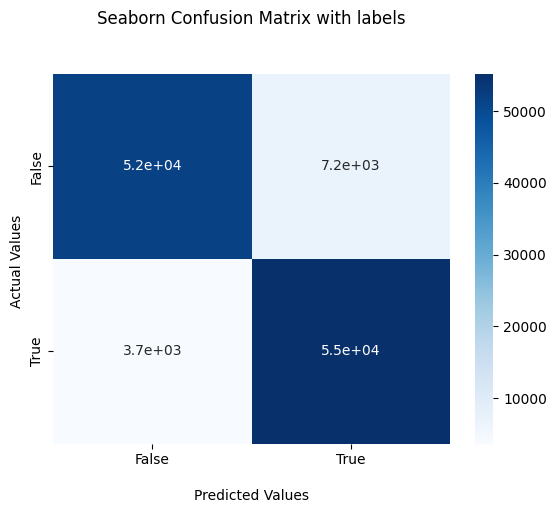

In [81]:
ax=sns.heatmap(cf_matrix,annot=True,cmap="Blues");
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

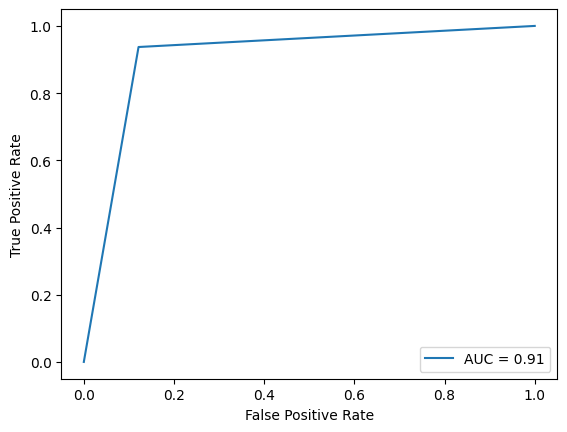

In [82]:
fpr,tpr,thresh=roc_curve(y_test_encoded,y_pred)
roc_auc=roc_auc_score(y_test_encoded,y_pred)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

### Observations 
* AUC = 0.91 which says that model is able to classify the Two different Classes by 91% time Correctly.
* "The More the Area Under the Curve the Better the Model"

## Model Saving

In [83]:
# joblib.dump(Best_model,"ML_Model.joblib")
# joblib.dump(encoder,"OHE_enc.joblib")